In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read and create data frame for Border Entries file
bd_ent = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [3]:
# Read and create data frame for Trade file
trade = pd.read_csv('COW_Trade_3.0/dyadic_trade_3.0.csv')

In [4]:
# clean trade dataframe to only get data on us imports from canada
can_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Canada')]

In [5]:
# clean trade dataframe to only get data on us imoprts from mexico
mex_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Mexico')]

In [6]:
# append mexico export data frame to canada export data frame
complete_nafta_trade = can_export.append(mex_export)
#flow 1 is entering millions of dollars into US from 'importer 2'

In [7]:
#pull year, importer , and flow columns to add to all_trade df later
nafta_trade = complete_nafta_trade[['year', 'importer1', 'importer2', 'flow1']].copy()

In [8]:
#TAKES A SHORT WHILE add year column to crossings df
bd_ent['Year'] = pd.to_datetime(bd_ent['Date']).dt.year

In [9]:
#each item in measure becomes a column in the all_trade df, with the values inserted into each year/country row
measures = bd_ent.groupby(['Year','Border','Measure'])['Value'].sum()

In [10]:
#isolate canadian and mexican crossings
measures = measures.reset_index()
can_measures = measures.loc[(measures['Border'] == 'US-Canada Border')]
mex_measures = measures.loc[(measures['Border'] == 'US-Mexico Border')]

In [11]:
#clean up a bit and pivot the df's to start creating our final df
can_measures = can_measures.reset_index()
mex_measures = mex_measures.reset_index()
mex_measures = mex_measures.drop(columns=['index','Border'])
can_measures = can_measures.drop(columns=['index','Border'])
pivot_can = can_measures.pivot(index = 'Year', columns = 'Measure', values = 'Value')
pivot_mex = mex_measures.pivot(index = 'Year', columns = 'Measure', values = 'Value')

In [12]:
#remove the rows for years we do not need and isolate by country
nafta_trade = nafta_trade.reset_index()
nafta_trade = nafta_trade.drop(columns='index')
nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
nafta_can_trim = nafta_can_trim.drop(index = np.arange(90,230))
nafta_mex_trim = nafta_trade.drop(index = np.arange(0,216))

In [13]:
#merge the mexican df's
nafta_mex_trim = nafta_mex_trim.set_index('year')
mexican_trade = pivot_mex.merge(nafta_mex_trim, left_index = True, right_on = 'year')

In [14]:
#merge the canadian df's
nafta_can_trim = nafta_can_trim.set_index('year')
canadian_trade = pivot_can.merge(nafta_can_trim, left_index = True, right_on = 'year')

In [15]:
#merge the mexican and candian df's, drop the column that's always "United States" and display data
all_trade = mexican_trade.append(canadian_trade)
all_trade = all_trade.drop(columns = 'importer1')
all_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer2,flow1
year,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,Mexico,157821.0


In [16]:
#drop 2019 as it is incomplete
pivot_can = pivot_can.drop(index = 2019)
pivot_mex = pivot_mex.drop(index = 2019)

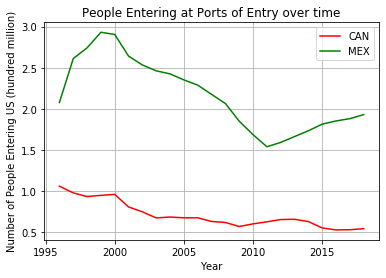

In [17]:
plt.plot((pivot_can['Bus Passengers'] + pivot_can['Pedestrians'] + pivot_can['Personal Vehicle Passengers'] + pivot_can['Train Passengers'])/100000000, 
         label='CAN', color = 'red')
plt.plot((pivot_mex['Bus Passengers'] + pivot_mex['Pedestrians'] + pivot_mex['Personal Vehicle Passengers'] + pivot_mex['Train Passengers'])/100000000, 
         label='MEX', color = 'green')
plt.ylabel('Number of People Entering US (hundred million)') #manually adjusted above with division by 1 hun mil
plt.xlabel('Year')
plt.title('People Entering at Ports of Entry over time')
plt.grid()
plt.legend()
#individuals entering the US occurs in far greater numbers at the mexican than canadian border (2-4x depending on year)
#individuals entering the US from mexico declined steadily from 2000 to 2011, and has increased since.

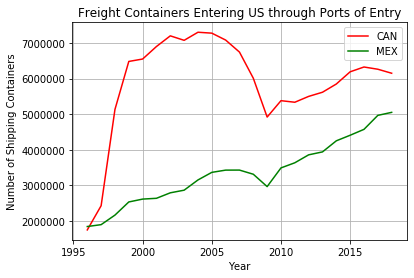

In [18]:
plt.plot(pivot_can['Rail Containers Full'] + pivot_can['Truck Containers Full'], label = 'CAN', color = 'red')
plt.plot(pivot_mex['Rail Containers Full'] + pivot_mex['Truck Containers Full'], label = 'MEX', color = 'green')
plt.ylabel('Number of Shipping Containers')
plt.xlabel('Year')
plt.title('Freight Containers Entering US through Ports of Entry')
plt.grid()
plt.legend()
#far more people than shipping containers arrive 
#more people arrive from mexico than from canada
#more shipping containers arrive from canada than from mexico

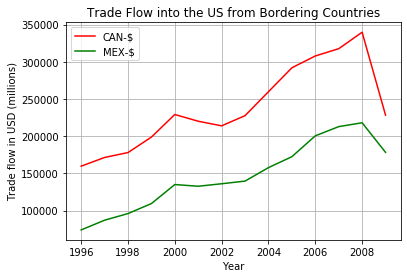

In [19]:
plt.plot(nafta_can_trim['flow1'], label = 'CAN-$', color = 'red')
plt.plot(nafta_mex_trim['flow1'], label = 'MEX-$', color = 'green')
plt.ylabel('Trade flow in USD (millions)')
plt.xlabel('Year')
plt.title('Trade Flow into the US from Bordering Countries')
plt.grid()
plt.legend()
#it's observed that more money enters the US as a result of trade with Canada than with Mexico

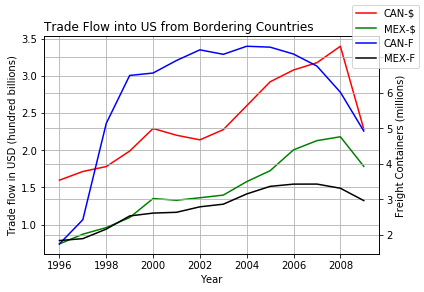

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(nafta_can_trim['flow1']/100000, label = 'CAN-$', color = 'red')
ax1.plot(nafta_mex_trim['flow1']/100000, label = 'MEX-$', color = 'green')
ax2 = ax1.twinx() #manually adjusting the axis scale in the 2 lines above and below
ax2.plot((canadian_trade['Rail Containers Full'] + canadian_trade['Truck Containers Full'])/1000000, label = 'CAN-F', color = 'blue')
ax2.plot((mexican_trade['Rail Containers Full'] + mexican_trade['Truck Containers Full'])/1000000, label = 'MEX-F', color = 'black')
ax2.set_ylabel('Freight Containers (millions)')
ax2.tick_params(axis='y')
ax1.set_ylabel('Trade flow in USD (hundred billions)')
ax1.set_xlabel('Year')
plt.title('Trade Flow into US from Bordering Countries', loc='left')
ax1.grid()
ax2.grid()
fig.legend(loc = 'upper right')

#appears to be a correlation between trade flow in and freight entering 
#todo: correlation check
#2009: recession had hit, all 4 values decline sharply
#canadian shipping containers came pouring in after nafta's enactment, greatest change

Text(0, 0.5, 'Shipping Containers')

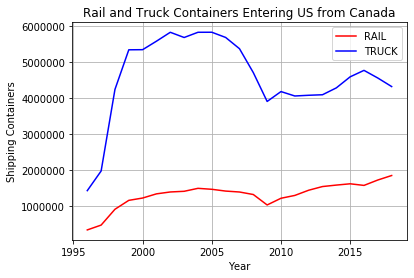

In [21]:
plt.plot(pivot_can['Rail Containers Full'], label = 'RAIL', color = 'red')
plt.plot(pivot_can['Truck Containers Full'], label = 'TRUCK', color = 'blue')
plt.grid()
plt.legend()
plt.title('Rail and Truck Containers Entering US from Canada')
plt.xlabel('Year')
plt.ylabel('Shipping Containers')
#the biggest change observed after the enactment of NAFTA is the amount of freight arriving from Canada by truck

In [37]:
#try to see where the jump from 95 to 00 in truck containers entering happened
trucks = bd_ent.loc[(bd_ent['Measure'] == 'Truck Containers Full') & (bd_ent['Border'] == 'US-Canada Border')]
gb_trucks = trucks.groupby(['Year','State'])['Value'].sum()
gb_trucks = gb_trucks.drop(columns='index')
gb_trucks = gb_trucks.reset_index()
mi_tk = gb_trucks.loc[(gb_trucks['State'] == 'Michigan')]
ny_tk = gb_trucks.loc[(gb_trucks['State'] == 'New York')]
mi_tk = mi_tk.set_index('Year')
ny_tk = ny_tk.set_index('Year')
mi_tk = mi_tk.drop(index = 2019) #2019 data is, of course, incomplete
ny_tk = ny_tk.drop(index = 2019)

Text(0.5, 1.0, 'Full Truck Containers entering the US from CA')

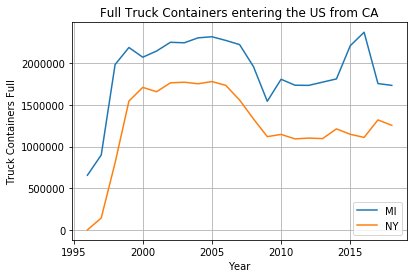

In [38]:
plt.plot(mi_tk['Value'], label = 'MI')
plt.plot(ny_tk['Value'], label = 'NY')
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Truck Containers Full')
plt.title('Full Truck Containers entering the US from CA')
#mi, ny, saw the greatest increase in freight entering after NAFTA's enactment, explaining the big increase
#2009 recession still demonstrated here

In [64]:
mi_po_tk = trucks.loc[(trucks['State'] == 'Michigan')]
ny_po_tk = trucks.loc[(trucks['State'] == 'New York')]

In [65]:
mi_tk_gb_ports = mi_po_tk.groupby(['Year','Port Name'])['Value'].sum()
mi_tk_gb_ports = mi_tk_gb_ports.drop(columns='index')
mi_tk_gb_ports = mi_tk_gb_ports.reset_index()

In [66]:
ny_tk_gb_ports = ny_po_tk.groupby(['Year','Port Name'])['Value'].sum()
ny_tk_gb_ports = ny_tk_gb_ports.drop(columns='index')
ny_tk_gb_ports = ny_tk_gb_ports.reset_index()

In [67]:
mi_tk_gb_ports = mi_tk_gb_ports.set_index('Year')
mi_tk_gb_ports = mi_tk_gb_ports.drop(index = 2019)

In [68]:
mi_tk_gb_ports = mi_tk_gb_ports.pivot(columns = 'Port Name', values = 'Value')

In [69]:
ny_tk_gb_ports = ny_tk_gb_ports.set_index('Year')
ny_tk_gb_ports = ny_tk_gb_ports.drop(index = 2019)

In [70]:
ny_tk_gb_ports = ny_tk_gb_ports.pivot(columns = 'Port Name', values = 'Value')

In [71]:
ny_tk_gb_ports = ny_tk_gb_ports.drop(columns = 'Cape Vincent')

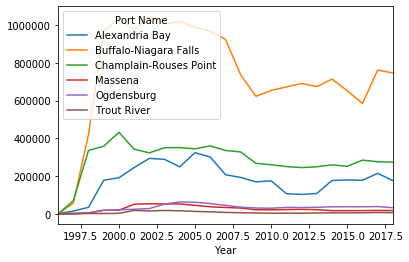

In [72]:
ny_tk_gb_ports.plot(kind='line')

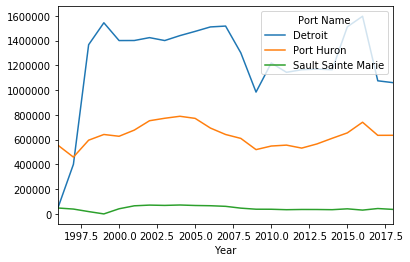

In [73]:
mi_tk_gb_ports.plot(kind='line')

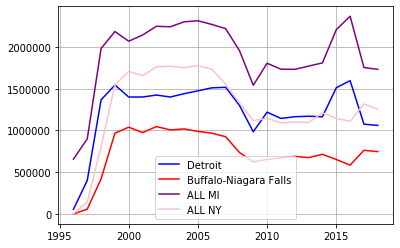

In [81]:
plt.plot(mi_tk_gb_ports['Detroit'], label = 'Detroit', color = 'blue')
plt.plot(ny_tk_gb_ports['Buffalo-Niagara Falls'], label = 'Buffalo-Niagara Falls', color = 'red')
plt.plot(mi_tk['Value'], label = 'ALL MI', color = 'purple')
plt.plot(ny_tk['Value'], label = 'ALL NY', color = 'pink')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Freight Containers entering US from CA')

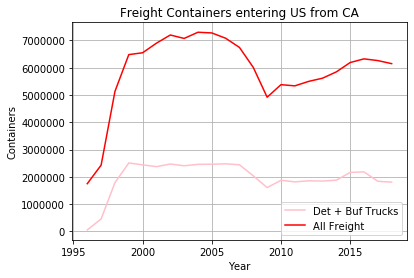

In [80]:
plt.plot(mi_tk_gb_ports['Detroit'] + ny_tk_gb_ports['Buffalo-Niagara Falls'], label = 'Det + Buf Trucks', color = 'pink')
plt.plot(pivot_can['Rail Containers Full'] +  pivot_can['Truck Containers Full'], label = 'All Freight', color = 'red')
plt.grid()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Containers')
plt.title('Freight Containers entering US from CA')
#todo, check correlation between sum of trucks entering at detroit and buff/nf and all freight